# Hit the fossilnet API - MASTER

You will have to be running the flask server for this to work.

In [1]:
urls = ["https://www.bgs.ac.uk/discoveringGeology/time/Fossilfocus/images/foraminifera/Elphidium.jpg",
        "https://earthsky.org/upl/2016/03/fish-fossil-green-river.jpg",
        "https://assets3.fossilera.com/sp2/150226/diplomystus/620x400/diplomystus-dentatus.jpg",
       ]

## GET

In [2]:
import requests

api = "http://127.0.0.1:5000/predict"   # Different endpoint.

params = {'url': urls[2]}

r = requests.get(api, params=params)

r.status_code

200

In [3]:
r.json()

{'class': 'fishes',
 'classes': ['dinosaurs', 'fishes', 'forams', 'trilobites'],
 'prob': 0.6288057016476409,
 'probs': [0.19490068554583764,
  0.6288057016476409,
  0.03485104285016501,
  0.14144256995635623]}

## POST with URL

In [4]:
api = "http://127.0.0.1:5000/post"

In [5]:
headers = {'contentType': "application/json"}
json = {'url': urls[2]}

In [6]:
r = requests.post(api, json=json, headers=headers)

In [7]:
r.status_code

200

In [8]:
r.headers

{'Content-Type': 'application/json', 'Content-Length': '189', 'Server': 'Werkzeug/1.0.1 Python/3.7.6', 'Date': 'Thu, 04 Jun 2020 14:52:52 GMT'}

In [9]:
r.json()

{'class': 'fishes',
 'classes': ['dinosaurs', 'fishes', 'forams', 'trilobites'],
 'prob': 0.6288057016476409,
 'probs': [0.19490068554583764,
  0.6288057016476409,
  0.03485104285016501,
  0.14144256995635623]}

## POST with the 'dual' endpoint

In [14]:
api = "http://127.0.0.1:5000/api/v1"

headers = {'contentType': "application/json"}
json = {'image': urls[2]}

r = requests.post(api, json=json, headers=headers)

In [17]:
r.json()

{'class': 'fishes',
 'classes': ['dinosaurs', 'fishes', 'forams', 'trilobites'],
 'prob': 0.6288057016476409,
 'probs': [0.19490068554583764,
  0.6288057016476409,
  0.03485104285016501,
  0.14144256995635623]}

## POST with base64-encoded image

First we fetch the image data (a bunch of bytes) from its URL, then we encode that

In [35]:
import base64

r = requests.get(urls[2])
img_b64 = base64.b64encode(r.content).decode('utf-8')

Now we can make a POST request to our server.

In [36]:
json = {'image': img_b64}
headers = {'Accept': 'application/json'}
api = "http://127.0.0.1:5000/base64"

r = requests.post(api, json=json, headers=headers)

In [37]:
r.status_code

200

In [38]:
r.json()

{'class': 'fishes',
 'classes': ['dinosaurs', 'fishes', 'forams', 'trilobites'],
 'prob': 0.6288057016476409,
 'probs': [0.19490068554583764,
  0.6288057016476409,
  0.03485104285016501,
  0.14144256995635623]}

## Making a b64 string from a disk image

How can we do that with a disk image?

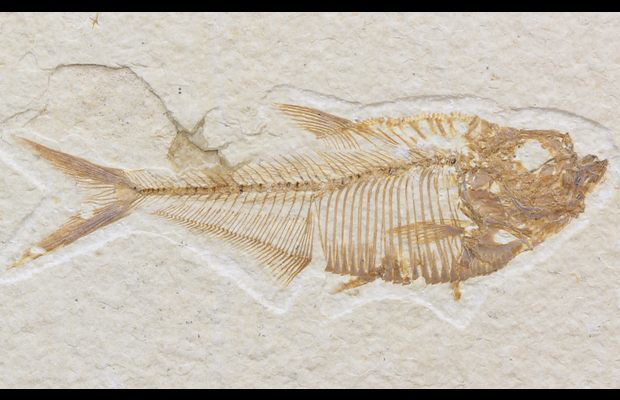

In [40]:
from PIL import Image

img = Image.open('42485-116.jpg')
img

In [42]:
from io import BytesIO

handle = BytesIO()
img.save(handle, format='png')
handle.seek(0)
img_b64 = base64.b64encode(handle.getvalue()).decode('utf-8')

We can actually read the bytes straight from the file, without `pillow`.

In [43]:
with open('42485-116.jpg', 'rb') as f:
    img_b64 = base64.b64encode(f.read()).decode('utf-8')

In [44]:
json = {'image': img_b64}

r = requests.post(api, json=json, headers=headers)

In [45]:
r.json()

{'class': 'fishes',
 'classes': ['dinosaurs', 'fishes', 'forams', 'trilobites'],
 'prob': 0.6288057016476409,
 'probs': [0.19490068554583764,
  0.6288057016476409,
  0.03485104285016501,
  0.14144256995635623]}